### Beyaz Şarap Kalitesi Tahmini



In [100]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [101]:
# Veri Setini Yükle
file_path = "winequality-white.csv"  # Doğru dosya yolunu buraya girin
data = pd.read_csv(file_path, sep=',')  # Veri setini pandas ile oku
data  # Veri setini yazdır

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [102]:
# Veri Genel Bakışı
print("Veri Seti Bilgisi:")
data.info()  # Veri setinin genel bilgilerini göster
print("\nVeri Seti Tanımlaması:")
print(data.describe())  # Veri setinin istatistiksel özetini ver

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

Veri Seti Tanımlaması:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    489

In [103]:
# Eksik Değer Kontrolü Yapılır
missing_values = data.isnull().sum()  # Her bir sütundaki eksik değerler kontrol edilir
print("\nEksik Değerler:")
print(missing_values)


Eksik Değerler:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Hedef Değişken Dağılımı

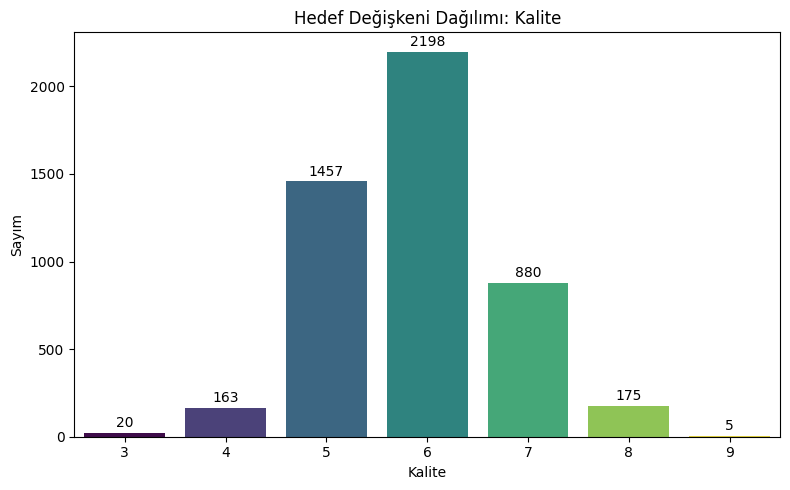

In [104]:
# Hedef değişkeninin (quality) dağılımını görselleştirme
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="quality", hue="quality", legend=False, palette="viridis")
plt.title("Hedef Değişkeni Dağılımı: Kalite")
plt.xlabel("Kalite")
plt.ylabel("Sayım")
# Çubukların üzerine değerleri yazdır
for i in plt.gca().containers:
    plt.gca().bar_label(i, padding=2)

# Grafiği göster
plt.tight_layout()
plt.show()

### Korelasyon Analizi

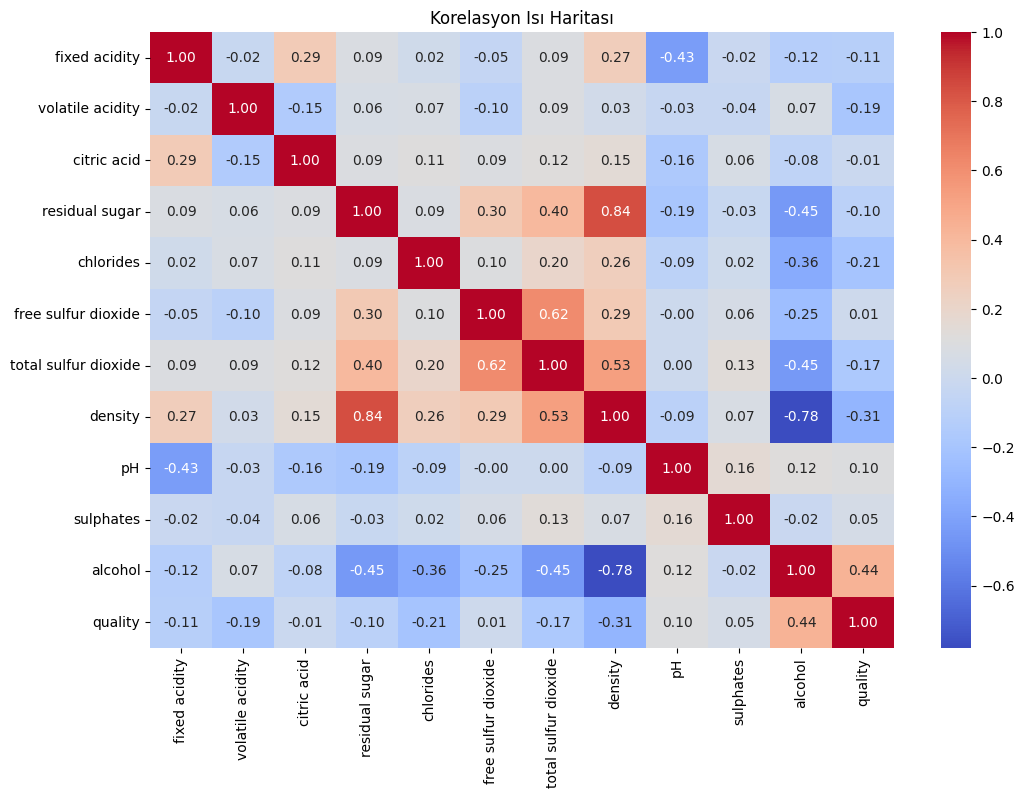

In [105]:
# Özellikler arasındaki korelasyonu gösteren ısı haritası
plt.figure(figsize=(12, 8))
data_corr = data.corr()  # Özellikler arasındaki korelasyonları hesapla
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()

### Özellik-Hedef İlişkileri

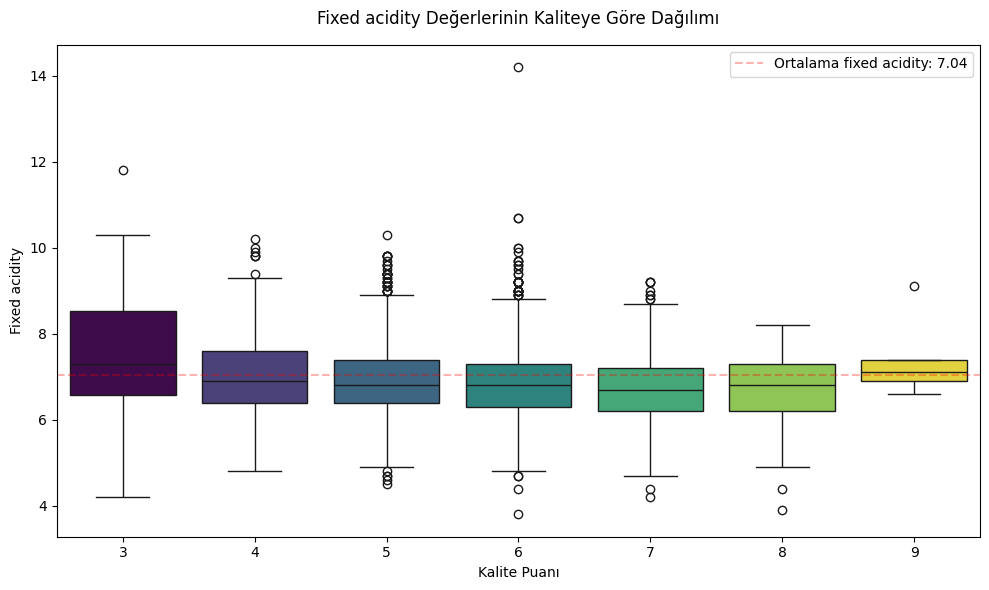

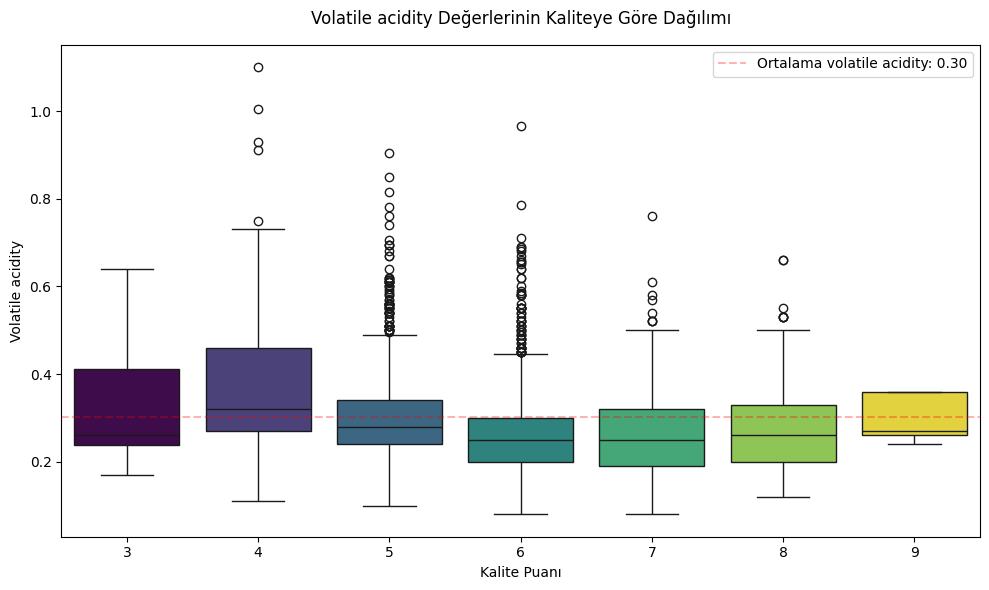

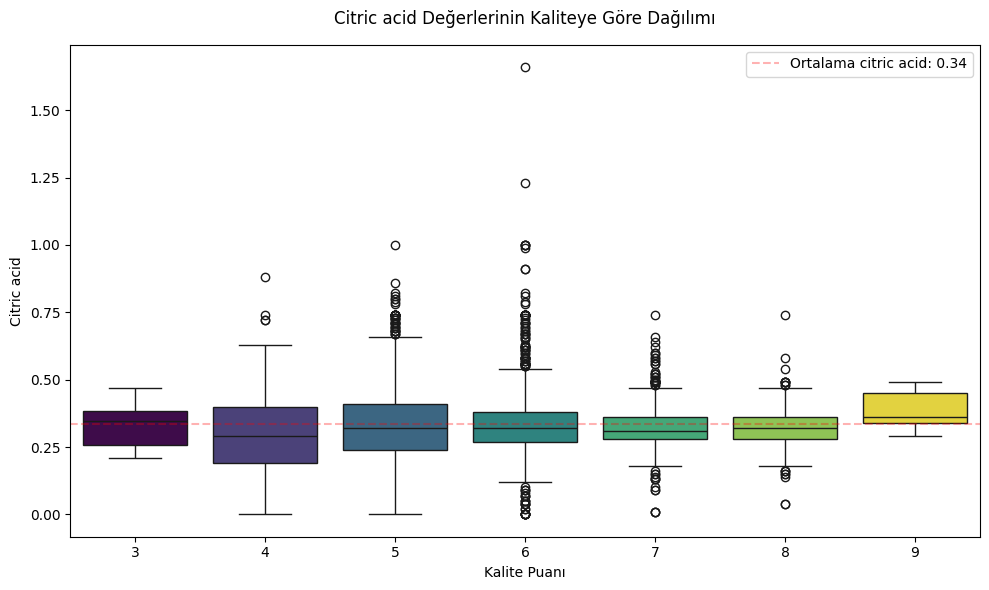

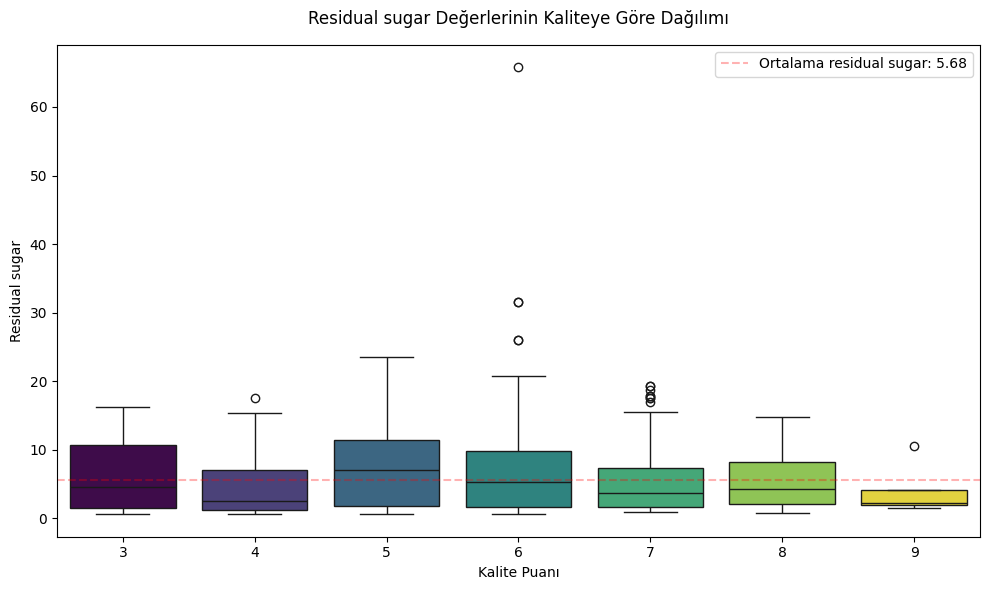

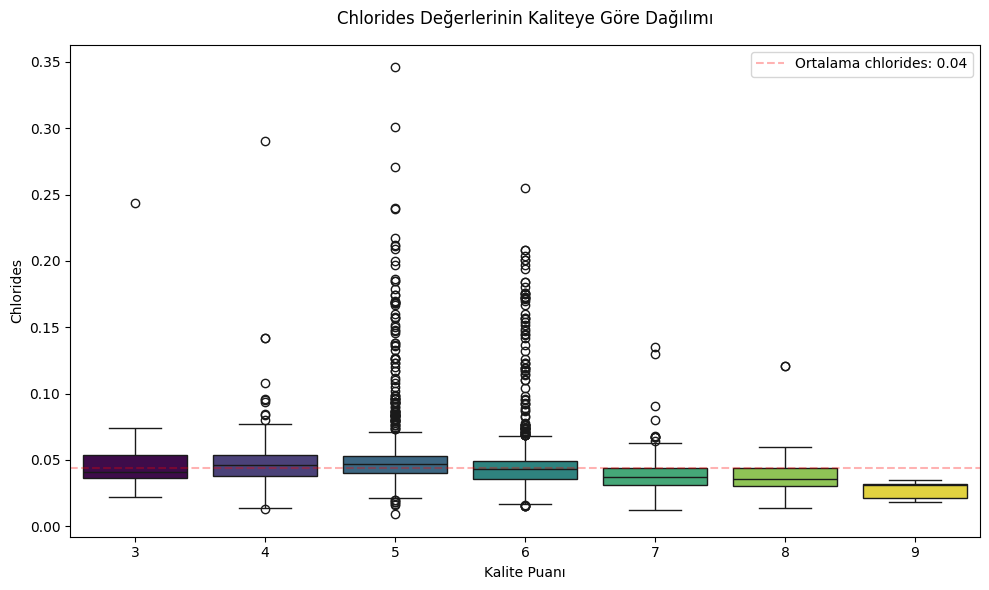

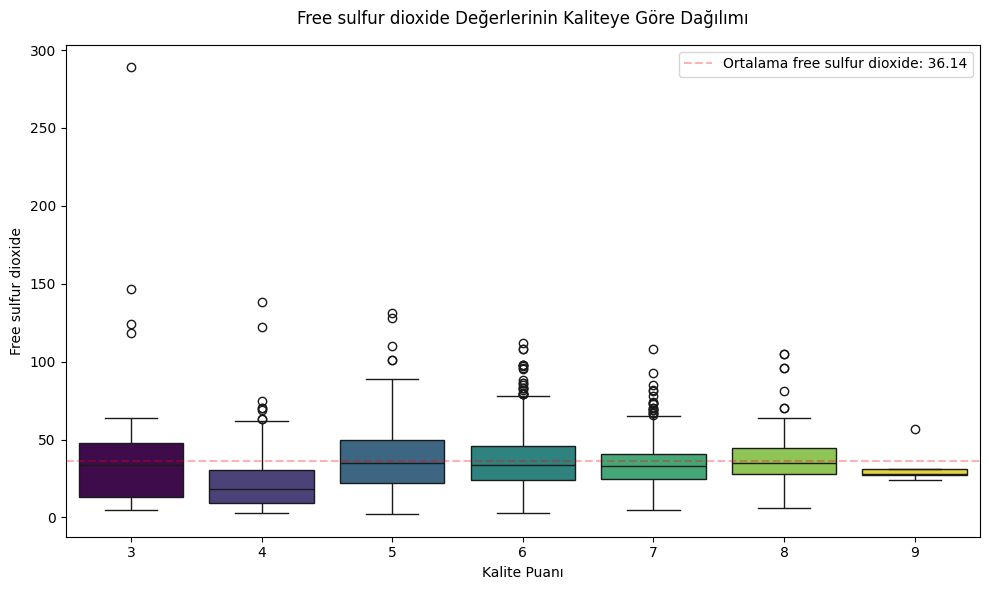

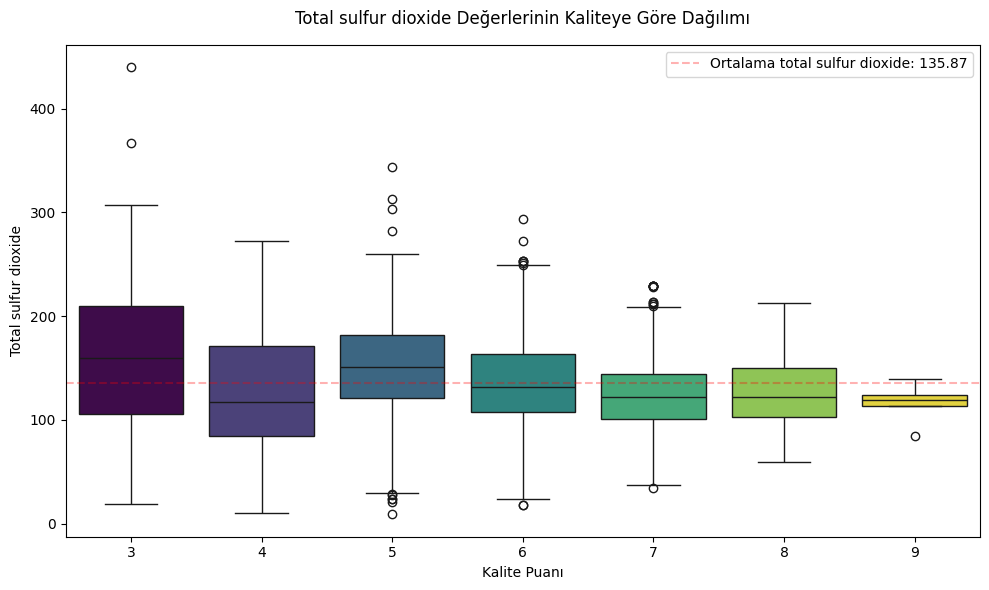

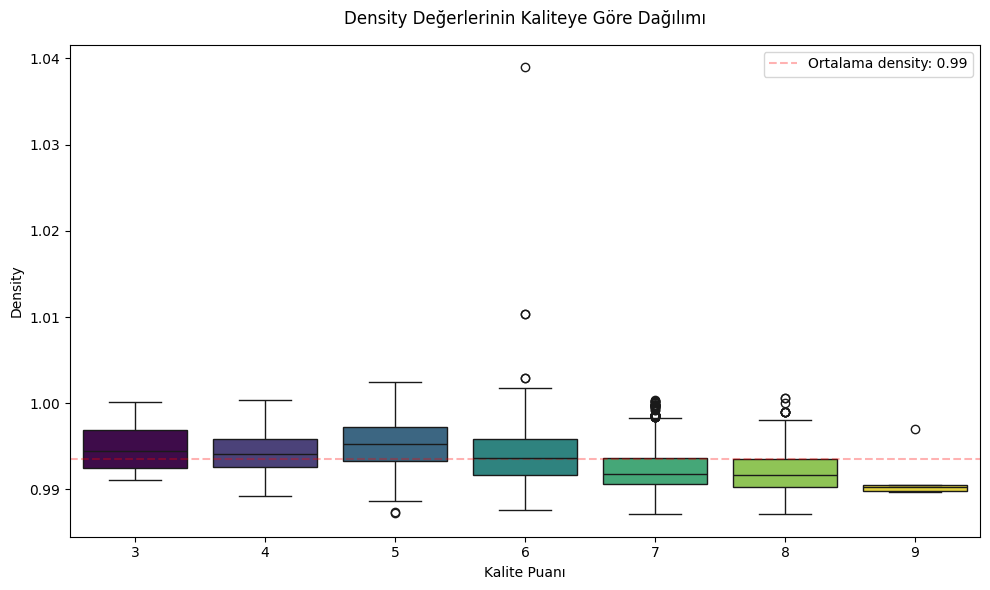

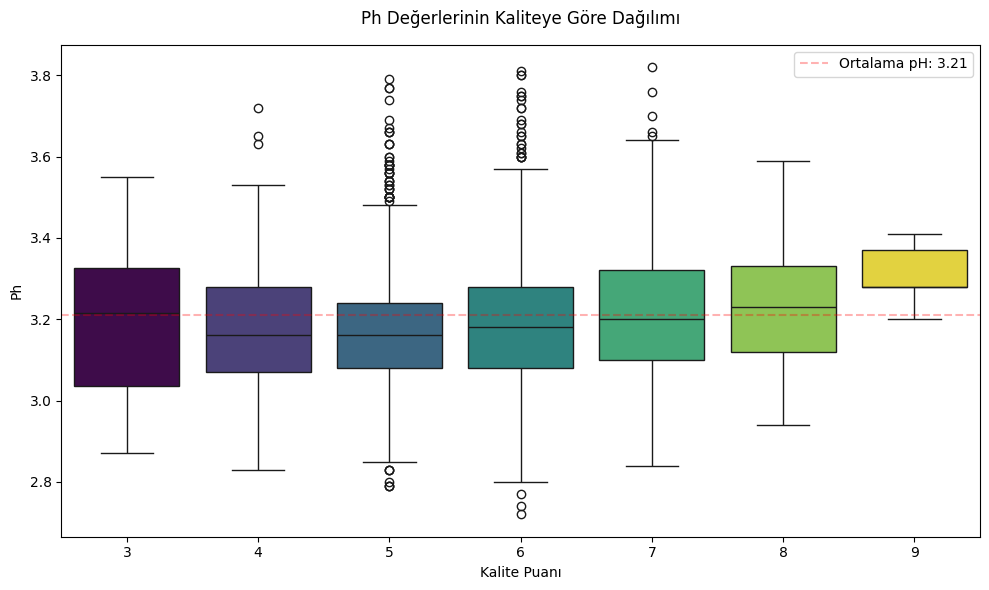

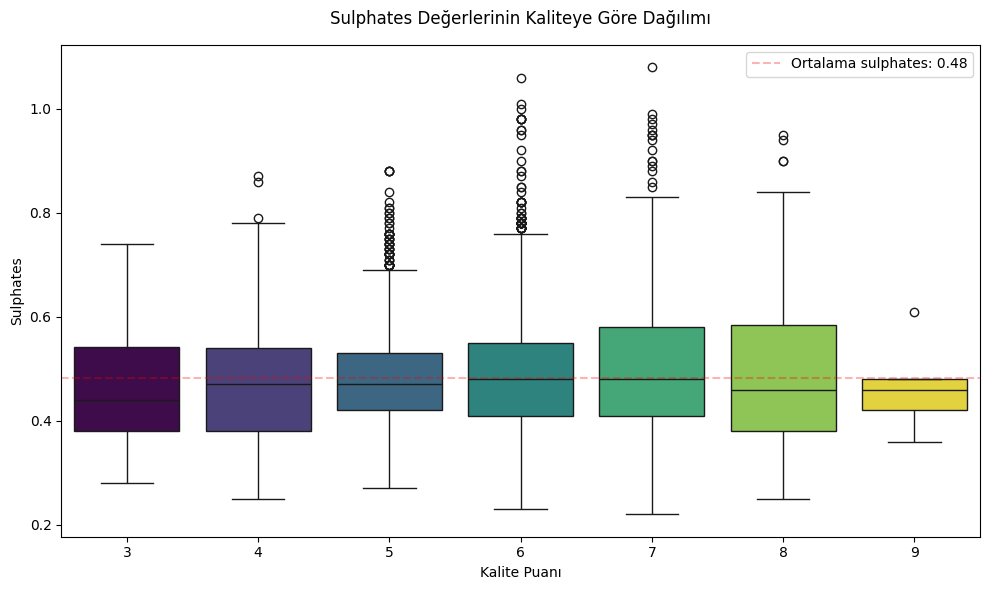

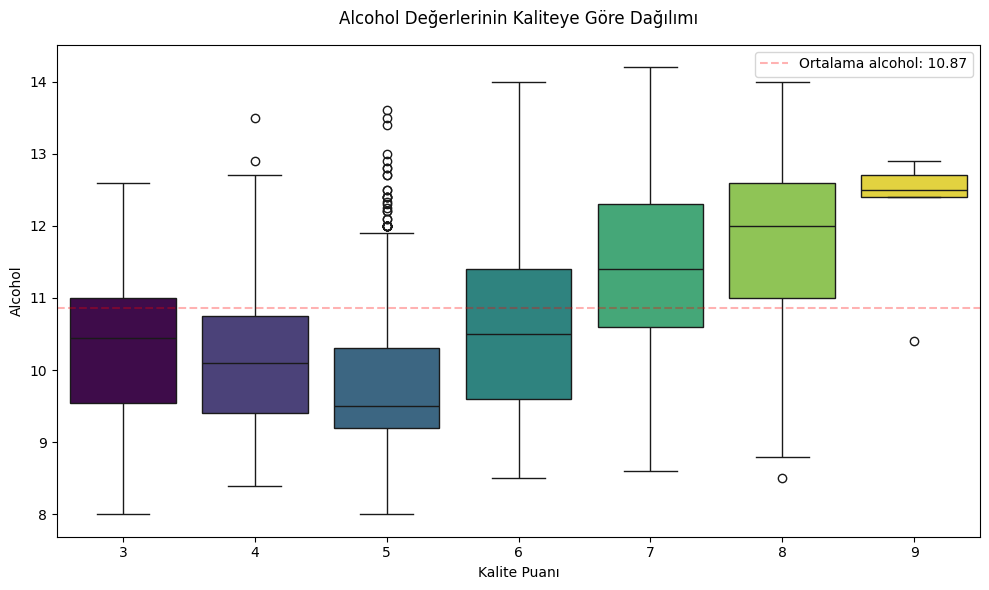

In [106]:
# Her bir özelliğin hedef değişken (quality) ile olan dağılımını görselleştir
for feature in data.columns[:-1]:  # Hedef değişken hariç tüm özellikler üzerinde döngü
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="quality", y=feature, data=data, hue="quality", legend=False, palette="viridis")
    plt.title(f"{feature.capitalize()} Değerlerinin Kaliteye Göre Dağılımı", pad=15)
    plt.xlabel("Kalite Puanı")
    plt.ylabel(feature.capitalize())
    # İstatistikleri ekle
    means = data.groupby('quality')[feature].mean()
    plt.axhline(y=means.mean(), color='r', linestyle='--', alpha=0.3, label=f'Ortalama {feature}: {means.mean():.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Aykırı Değer Tespiti ve Temizleme (IQR Yöntemi)

In [107]:
# IQR kullanarak aykırı değerleri tespit et ve veriyi temizle
Q1 = data.quantile(0.25)  # Birinci Çeyrek (25. persentil)
Q3 = data.quantile(0.75)  # Üçüncü Çeyrek (75. persentil)
IQR = Q3 - Q1  # Çeyrekler Arası Aralık

alt_sinir = Q1 - 1.5 * IQR  # Aykırı değerleri tespit etmek için alt sınır
ust_sinir = Q3 + 1.5 * IQR  # Aykırı değerleri tespit etmek için üst sınır

In [108]:
# Aykırı değerlere sahip satırları (IQR aralığı dışında kalan) veriden çıkar
cleaned_data = data[~((data < alt_sinir) | (data > ust_sinir)).any(axis=1)]
print(f"\nTemizlenmeden Önce Veri Seti Boyutu: {data.shape}")
print(f"Temizlendikten Sonra Veri Seti Boyutu: {cleaned_data.shape}")


Temizlenmeden Önce Veri Seti Boyutu: (4898, 12)
Temizlendikten Sonra Veri Seti Boyutu: (3858, 12)


In [109]:
# Veriyi güvenli bir şekilde kopyala
cleaned_data = data.copy()

# İkili sınıflandırma için kalite değerlerini dönüştür
cleaned_data.loc[:, 'quality'] = cleaned_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Dönüşümü kontrol et
print("Dönüştürülmüş kalite değerlerinin dağılımı:")
print(cleaned_data['quality'].value_counts())
print("\nYüzdelik dağılım:")
print(cleaned_data['quality'].value_counts(normalize=True).round(3) * 100)

Dönüştürülmüş kalite değerlerinin dağılımı:
quality
1    3258
0    1640
Name: count, dtype: int64

Yüzdelik dağılım:
quality
1    66.5
0    33.5
Name: proportion, dtype: float64


In [110]:
# Özellikler ve Hedef Değişkenini Ayır
X = cleaned_data.drop('quality', axis=1)  # Özellikler
y = cleaned_data['quality']  # Hedef

### Özellik Ölçekleme

In [111]:
# Özellikleri ölçeklendirerek model performansını iyileştirebiliriz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Özellikleri standardize et

### Eğitim ve Test Verisi Ayırma

In [112]:
# Veriyi eğitim (yüzde 80) ve test (yüzde 20) olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelleme

In [113]:
# Lojistik Regresyon Modeli
log_model = LogisticRegression(random_state=42)  # Lojistik regresyon modelini başlat
log_model.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit
y_pred_log = log_model.predict(X_test)  # Test verisi ile tahmin yap

In [114]:
# Karar Ağaçları Modeli
tree_model = DecisionTreeClassifier(random_state=42)  # Karar ağacı modelini başlat
tree_model.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit
y_pred_tree = tree_model.predict(X_test)  # Test verisi ile tahmin yap

In [115]:
# Rastgele Orman Modeli
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Rastgele orman modelini başlat
rf_model.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit
y_pred_rf = rf_model.predict(X_test)  # Test verisi ile tahmin yap

### Performans Değerlendirme

In [116]:
# Bir modelin performansını değerlendirmek ve görselleştirmek için fonksiyon
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("\nKarışıklık Matrisi:")
    cm = confusion_matrix(y_test, y_pred)  # Karışıklık matrisini hesapla
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Karışıklık matrisini ısı haritası olarak görselleştir
    plt.title(f"Karışıklık Matrisi: {model_name}")
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.show()

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))  # Sınıflandırma raporunu yazdır


Model: Lojistik Regresyon

Karışıklık Matrisi:


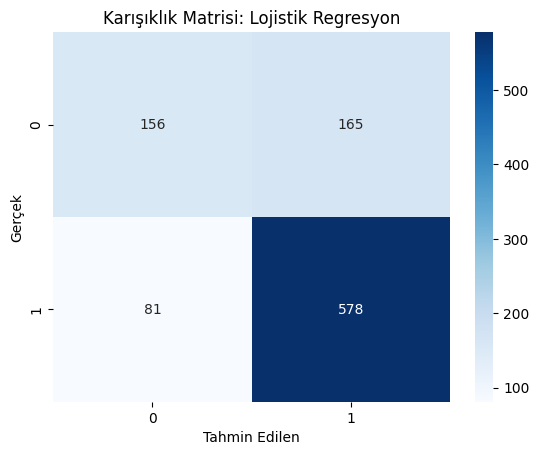


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       321
           1       0.78      0.88      0.82       659

    accuracy                           0.75       980
   macro avg       0.72      0.68      0.69       980
weighted avg       0.74      0.75      0.74       980


Model: Karar Ağaçları

Karışıklık Matrisi:


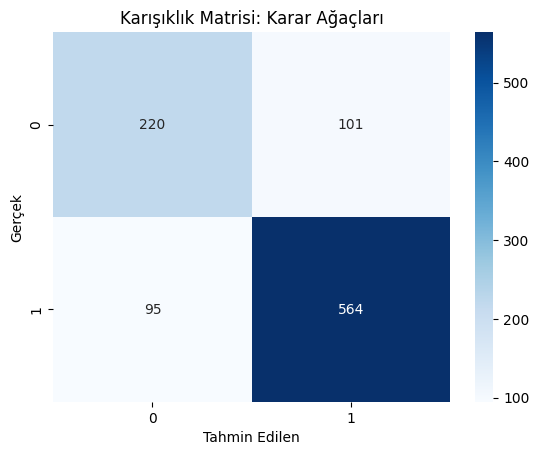


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       321
           1       0.85      0.86      0.85       659

    accuracy                           0.80       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.80      0.80      0.80       980


Model: Rastgele Orman

Karışıklık Matrisi:


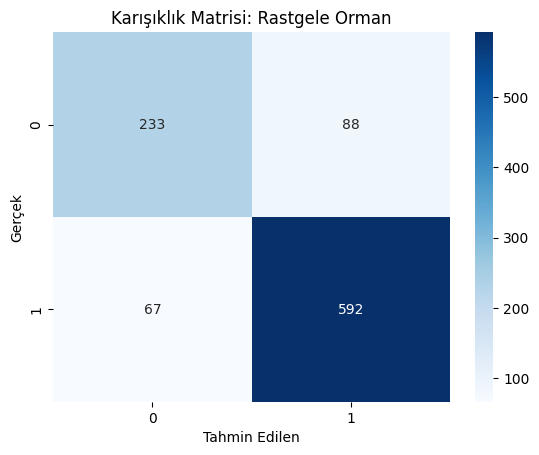


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       321
           1       0.87      0.90      0.88       659

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [117]:
# Modelleri Değerlendir
evaluate_model(y_test, y_pred_log, "Lojistik Regresyon")  # Lojistik Regresyon modelini değerlendir
evaluate_model(y_test, y_pred_tree, "Karar Ağaçları")  # Karar Ağaçları modelini değerlendir
evaluate_model(y_test, y_pred_rf, "Rastgele Orman")  # Rastgele Orman modelini değerlendir

### ROC Eğrisi

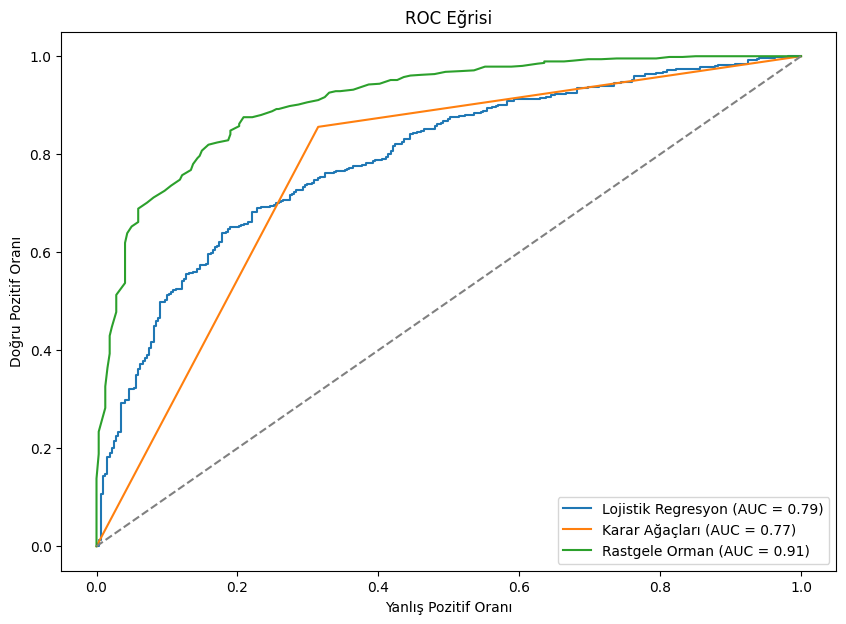

In [118]:
# Modellerin farklı eşiklerdeki performanslarını karşılaştırmak için ROC eğrisini çiz
plt.figure(figsize=(10, 7))
for model, pred, name in zip([log_model, tree_model, rf_model], [y_pred_log, y_pred_tree, y_pred_rf], ["Lojistik Regresyon", "Karar Ağaçları", "Rastgele Orman"]):
    try:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])  # FPR ve TPR hesapla
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})")  # ROC eğrisini çiz
    except AttributeError:
        print(f"{name} 'predict_proba' fonksiyonunu desteklemiyor.")
        continue

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Rasgele sınıflandırıcı için referans çizgisi
plt.title("ROC Eğrisi")
plt.xlabel("Yanlış Pozitif Oranı")
plt.ylabel("Doğru Pozitif Oranı")
plt.legend()
plt.show()

## Sonuç
### Tüm üç model değerlendirildikten sonra şu sonuçlara varılabilir:
### - Lojistik Regresyon: Hızlı ve basit ancak karmaşık verilere iyi uyum sağlamayabilir.
### - Karar Ağaçları: Aşırı uyum sağlama riski var; ayar yapılarak daha iyi performans elde edilebilir.
### - Rastgele Orman: Üç model arasında en iyi genelleme ve performansa sahip.